# Opružno njihalo



U ovom zadatku cilj je pronaći jednadžbe gibanja tijela mase m ovješenog na opruzi duljine L i konstante k. Zatim ćemo ispisati kod koji će numerički riješiti te demonstrirati ta rješenja na nizu grafova. Kao početne uvjete zadatka također zadajemo početni položaj mase u kartezijevim koordinatama kao i njenu brzinu.

Sile koje djeluju na ovješeno tijelo u svakom trenutku su gravitacijska sila i elastična sila opruge. 
U kartezijevom koordinatnom sustavu postavljamo pripadne jednadžbe u x i y smjeru.
Da bismo to napravili moramo rastaviti elastičnu silu na njene x i y komponente, a gravitacijsku silu ne moramo rastavljati budući da je ona uvijek konstantnog iznosa u y smjeru.


$$\vec{F_{g}}=-mg\vec{y}$$
$$\vec{F_{el}}=-k(\sqrt{x^2+y^2}-L_{0})\sin(\theta)\vec{x}-k(\sqrt{x^2+y^2}-L_{0})\cos(\theta)\vec{y}$$

Pri čemu su naravno

$$\sin(\theta)=\frac{x}{\sqrt{x^2+y^2}}$$
$$\cos(\theta)=\frac{y}{\sqrt{x^2+y^2}}$$


Stoga u x i y smjeru imamo jednadžbe:

$$ma_{x}=F_{el}\sin(\theta)$$

$$ma_{y}=F_{el}\cos(\theta)-mg$$


Iz kojih napokon slijede jednadžbe:

$$m\frac{d^2x}{dt^2}=-k(\sqrt{x^2+y^2}-L_{0})\frac{x}{\sqrt{x^2+y^2}}$$

$$m\frac{d^2y}{dt^2}=-mg-k(\sqrt{x^2+y^2}-L_{0})\frac{y}{\sqrt{x^2+y^2}}$$


koje ćemo koristiti unutar koda kako bismo našli njihova numerička rješenja pomoću funkcije odeint za daljnju analizu problema.












## Početni uvjeti

In [30]:
#uvjeti
L0=20
k=100
m=10
g=9.81

#početni položaj i brzina
x0=7
y0=0
vx0=0
vy0=0

#vrijeme
t=50

## Kod

In [31]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

%matplotlib inline

def funkcije(z, vrijeme, L0, k, m):
    xx, a, yy, b = z
    xderiv=a
    aderiv=-k/m*(np.sqrt(xx**2+yy**2)-L0)*xx/np.sqrt(xx**2+yy**2)
    yderiv=b
    bderiv=-g-k/m*(np.sqrt(xx**2+yy**2)-L0)*yy/np.sqrt(xx**2+yy**2)
    return xderiv, aderiv, yderiv, bderiv
    
    
dt=0.01
vrijeme=np.arange(0, t, dt)
 
vrijednosti0=[x0, vx0, y0, vy0]

vrijednosti=odeint(funkcije, vrijednosti0, vrijeme, args=(L0, k, m))

x,y=vrijednosti[:,0],vrijednosti[:,2]
vx,vy=vrijednosti[:,1],vrijednosti[:,3]
                                    


## Graf X-Y (putanja njihala)

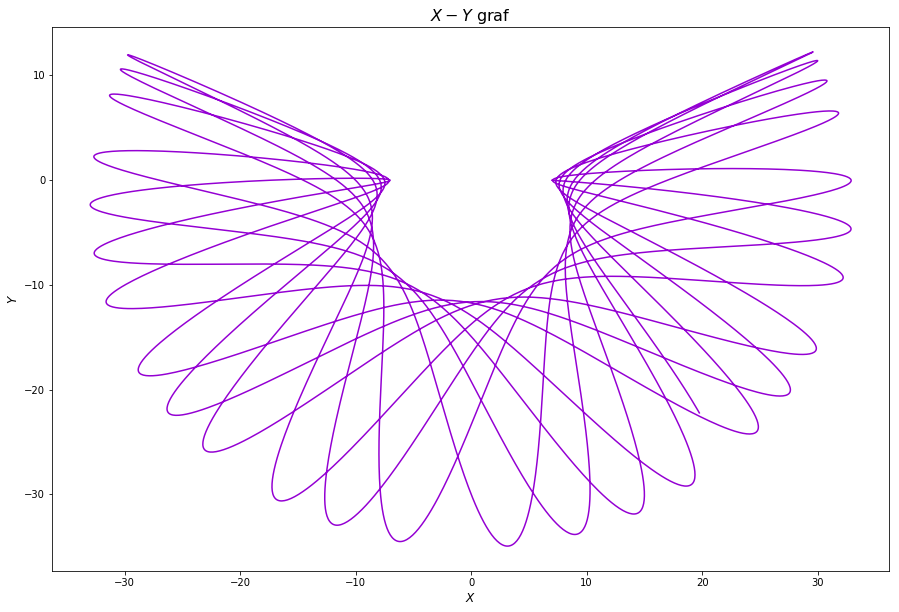

In [87]:
fig1, ax=plt.subplots(figsize=[15,10])
ax.plot(x, y, color="darkviolet", linewidth=1.5)
ax.set_xlabel('$X$', fontsize=12)
ax.set_ylabel('$Y$', fontsize=12)
ax.set_title('$X-Y$ graf',fontsize=16)
plt.show()
print('\n')

## Graf Vx - Vy

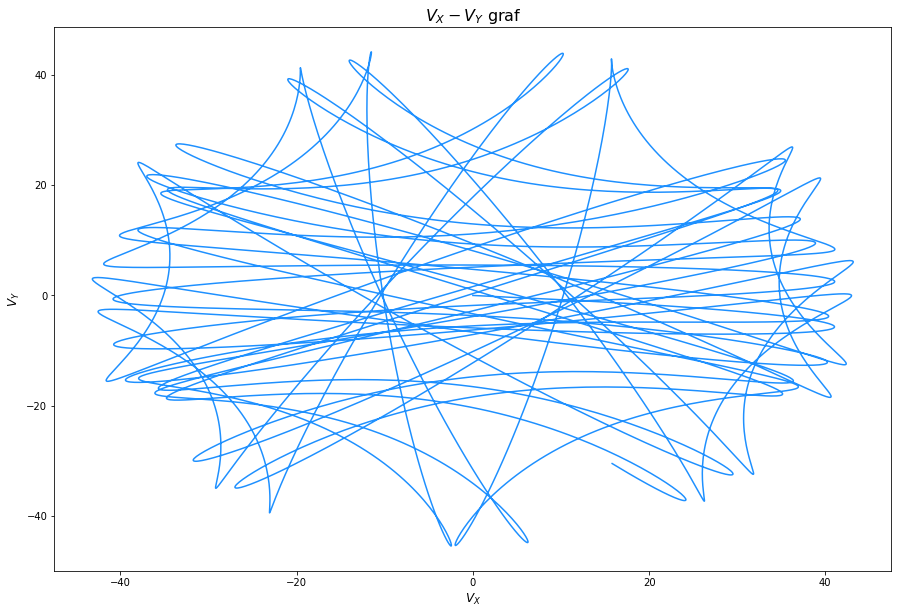

In [89]:
fig2, ax=plt.subplots(figsize=[15,10])
ax.plot(vx, vy, color="dodgerblue", linewidth=1.5)
ax.set_xlabel('$V_{X}$', fontsize=12)
ax.set_ylabel('$V_{Y}$', fontsize=12)
ax.set_title('$V_{X}-V_{Y}$ graf',fontsize=16)
plt.show()
print('\n')

## Graf X - Vx (fazni prostor)

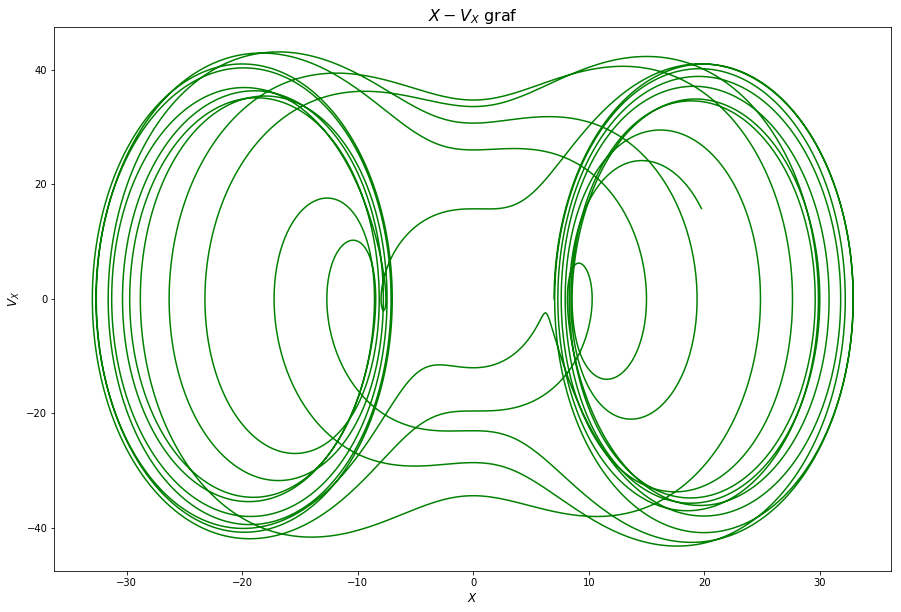

In [96]:
fig3, ax=plt.subplots(figsize=[15,10])
ax.plot(x, vx, color="green", linewidth=1.5)
ax.set_xlabel('$X$', fontsize=12)
ax.set_ylabel('$V_{X}$', fontsize=12)
ax.set_title('$X-V_{X}$ graf',fontsize=16)
plt.show()
print('\n')

## Graf Y - Vy (fazni prostor)

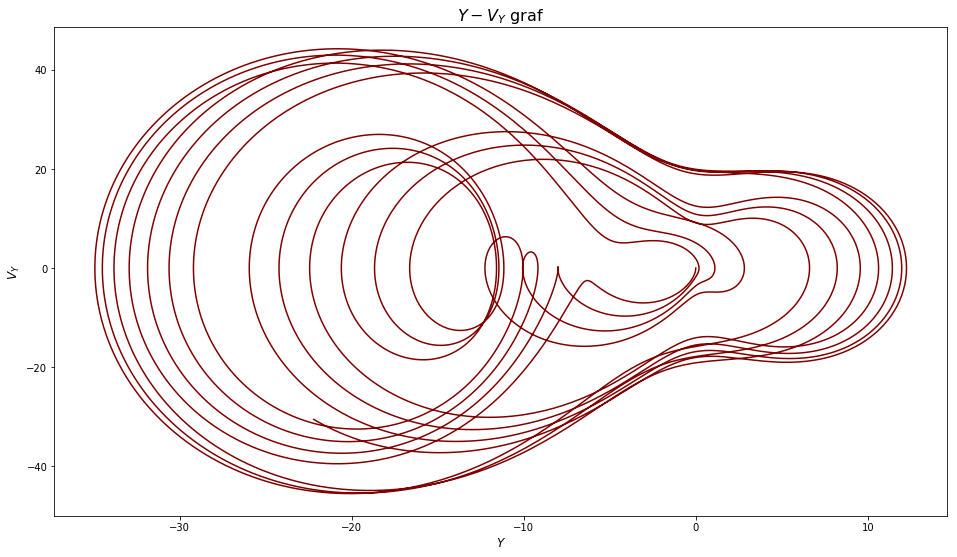

In [97]:
fig4, ax=plt.subplots(figsize=[16,9])
ax.plot(y, vy, color="maroon", linewidth=1.5)
ax.set_xlabel('$Y$', fontsize=12)
ax.set_ylabel('$V_{Y}$', fontsize=12)
ax.set_title('$Y-V_{Y}$ graf',fontsize=16)
plt.show()
print('\n')fig4, ax=plt.subplots(figsize=[16,9])
ax.plot(y, vy, color="maroon", linewidth=1.5)
ax.set_xlabel('$Y$', fontsize=12)
ax.set_ylabel('$V_{Y}$', fontsize=12)
ax.set_title('$Y-V_{Y}$ graf',fontsize=16)
plt.show()
print('\n')

## Graf X - t i Y - t

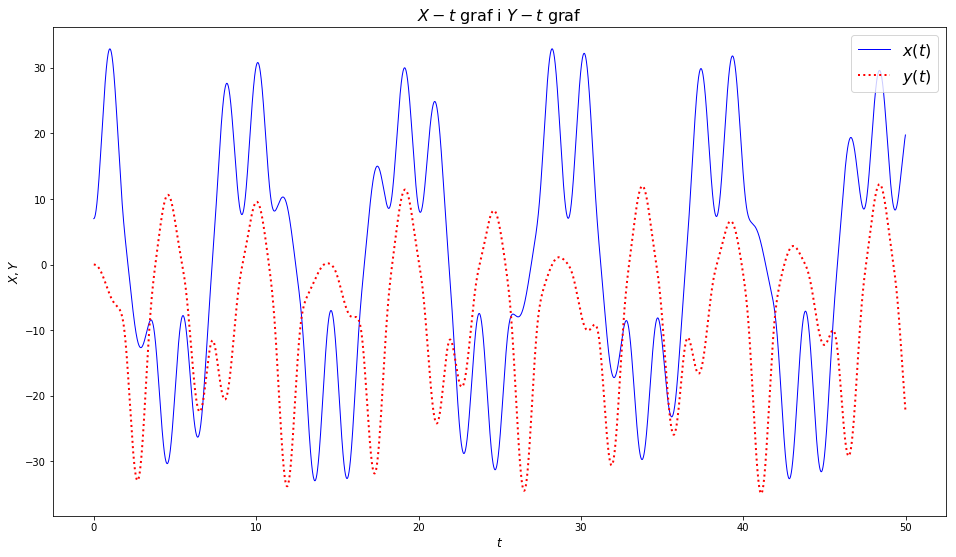

In [98]:
fig5, ax=plt.subplots(figsize=[16,9])
ax.plot(vrijeme, x, color="blue", linewidth=1,label='$x(t)$')
ax.plot(vrijeme, y, color="red",linestyle=':', linewidth=2,label='$y(t)$')
ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$X,Y$', fontsize=12)
ax.set_title('$X-t$ graf i $Y-t$ graf',fontsize=16)
ax.legend(loc="upper right",fontsize=16)
plt.show()
print('\n')

## Graf Vx - t i Vy - t

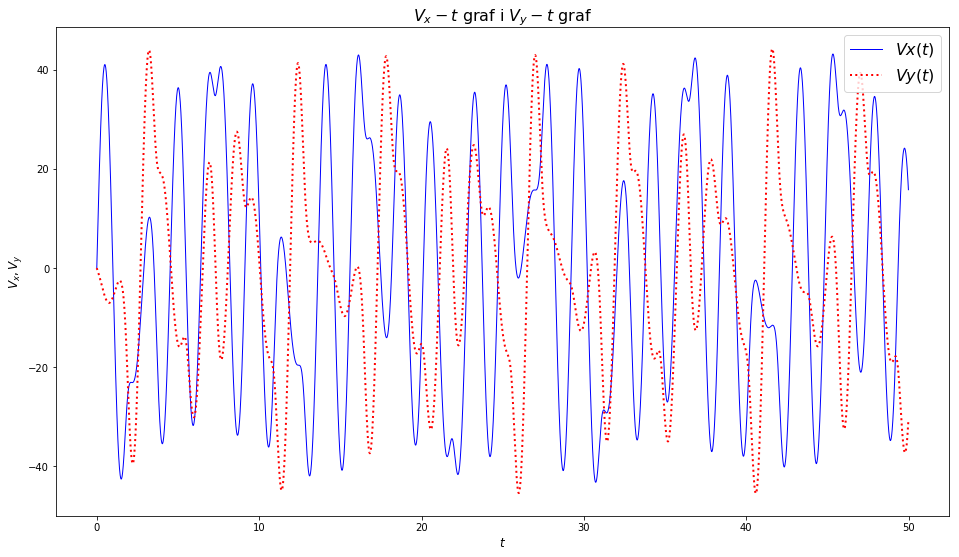

In [99]:
fig6, ax=plt.subplots(figsize=[16,9])
ax.plot(vrijeme, vx, color="blue", linewidth=1,label='$Vx(t)$')
ax.plot(vrijeme, vy, color="red",linestyle=':', linewidth=2,label='$Vy(t)$')
ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$V_{x},V_{y}$', fontsize=12)
ax.set_title('$V_{x}-t$ graf i $V_{y}-t$ graf',fontsize=16)
ax.legend(loc="upper right",fontsize=16)
plt.show()

## Drugi primjer

In [135]:
vrijednosti01=[5, 5, 5, 5]

vrijednosti1=odeint(funkcije, vrijednosti01, vrijeme, args=(L0, k, m))

x1,y1=vrijednosti1[:,0],vrijednosti1[:,2]
vx1,vy1=vrijednosti1[:,1],vrijednosti1[:,3]

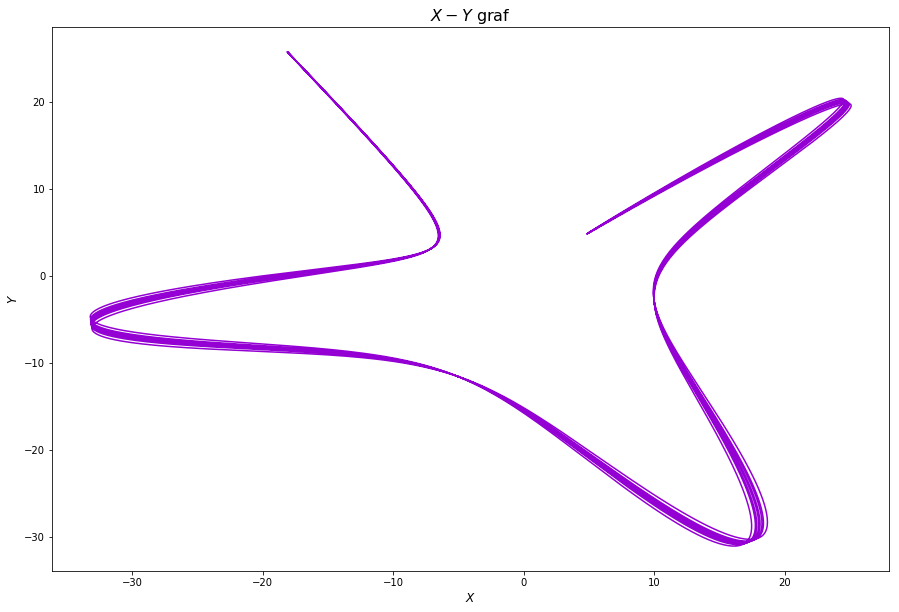

In [138]:
fig1, ax=plt.subplots(figsize=[15,10])
ax.plot(x1, y1, color="darkviolet", linewidth=1.5)
ax.set_xlabel('$X$', fontsize=12)
ax.set_ylabel('$Y$', fontsize=12)
ax.set_title('$X-Y$ graf',fontsize=16)
plt.show()
print('\n')

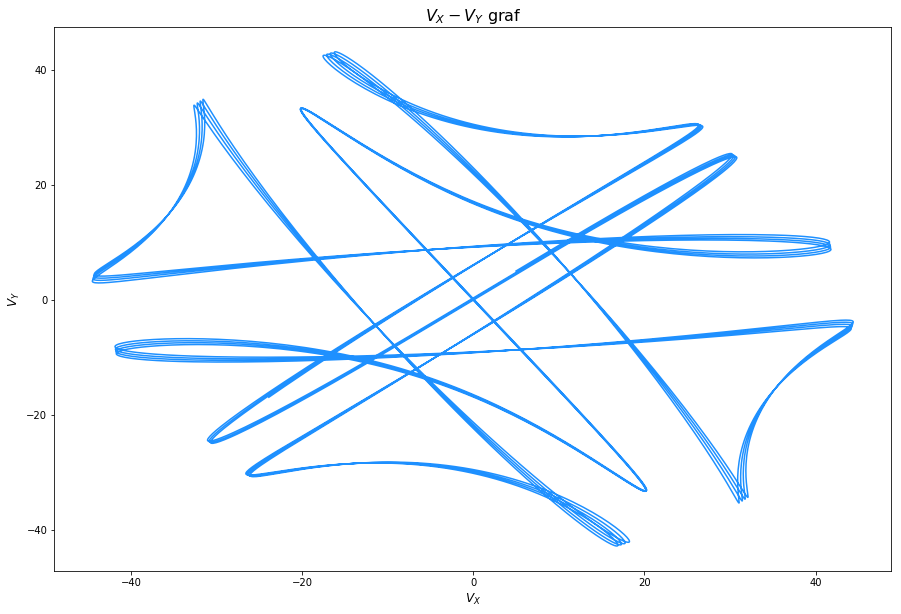

In [139]:
fig2, ax=plt.subplots(figsize=[15,10])
ax.plot(vx1, vy1, color="dodgerblue", linewidth=1.5)
ax.set_xlabel('$V_{X}$', fontsize=12)
ax.set_ylabel('$V_{Y}$', fontsize=12)
ax.set_title('$V_{X}-V_{Y}$ graf',fontsize=16)
plt.show()
print('\n')

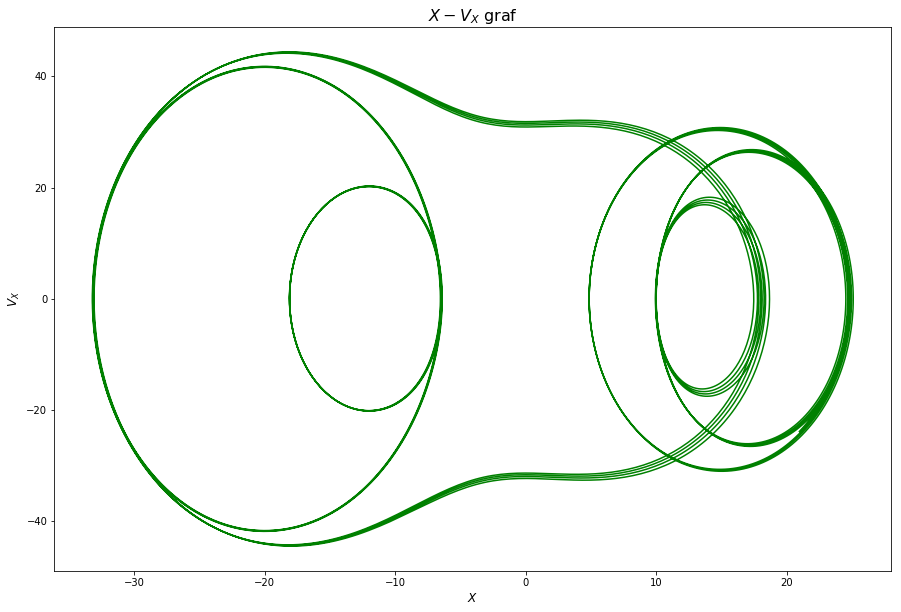

In [146]:
fig3, ax=plt.subplots(figsize=[15,10])
ax.plot(x1, vx1, color="green", linewidth=1.5)
ax.set_xlabel('$X$', fontsize=12)
ax.set_ylabel('$V_{X}$', fontsize=12)
ax.set_title('$X-V_{X}$ graf',fontsize=16)
plt.show()
print('\n')

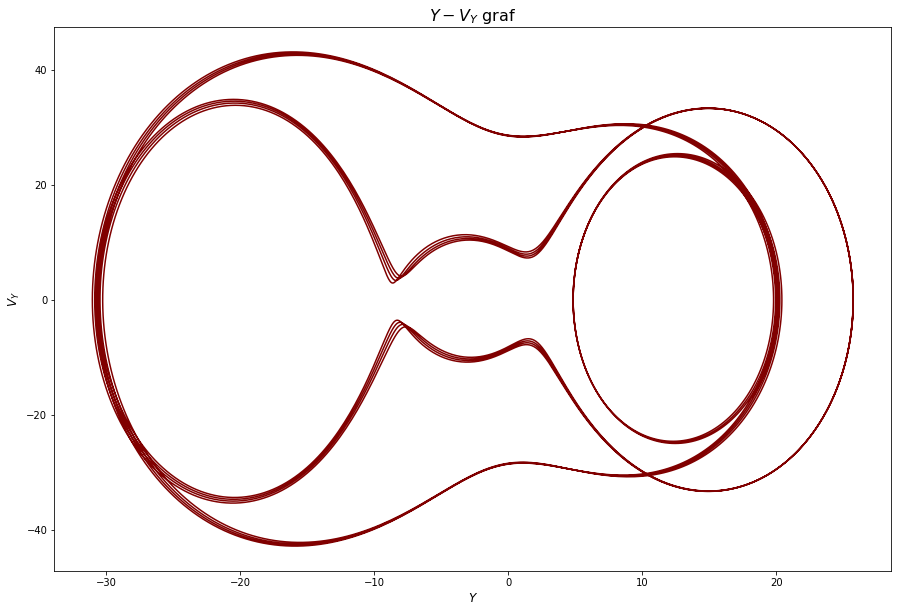

In [143]:
fig4, ax=plt.subplots(figsize=[15,10])
ax.plot(y1, vy1, color="maroon", linewidth=1.5)
ax.set_xlabel('$Y$', fontsize=12)
ax.set_ylabel('$V_{Y}$', fontsize=12)
ax.set_title('$Y-V_{Y}$ graf',fontsize=16)
plt.show()
print('\n')

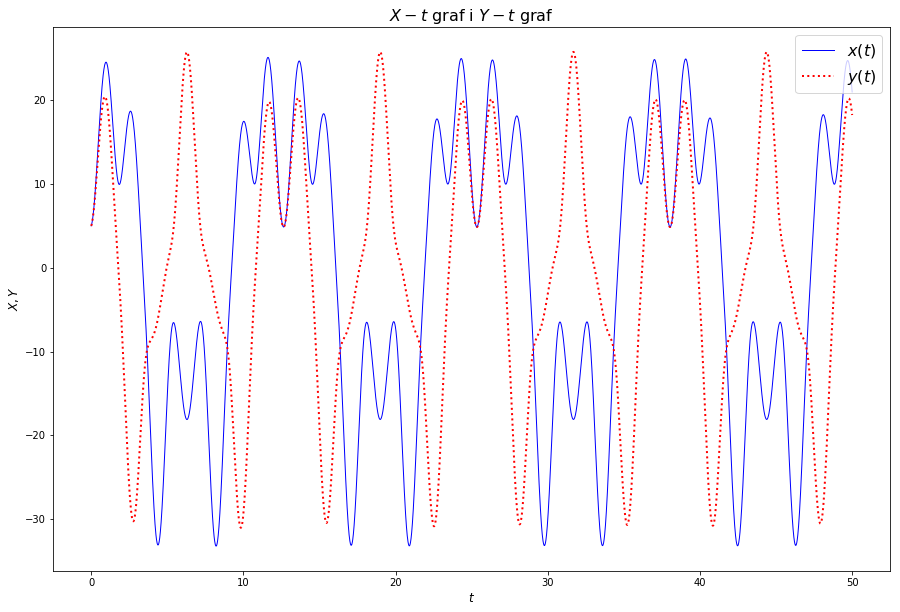

In [144]:
fig5, ax=plt.subplots(figsize=[15,10])
ax.plot(vrijeme, x1, color="blue", linewidth=1,label='$x(t)$')
ax.plot(vrijeme, y1, color="red",linestyle=':', linewidth=2,label='$y(t)$')
ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$X,Y$', fontsize=12)
ax.set_title('$X-t$ graf i $Y-t$ graf',fontsize=16)
ax.legend(loc="upper right",fontsize=16)
plt.show()
print('\n')

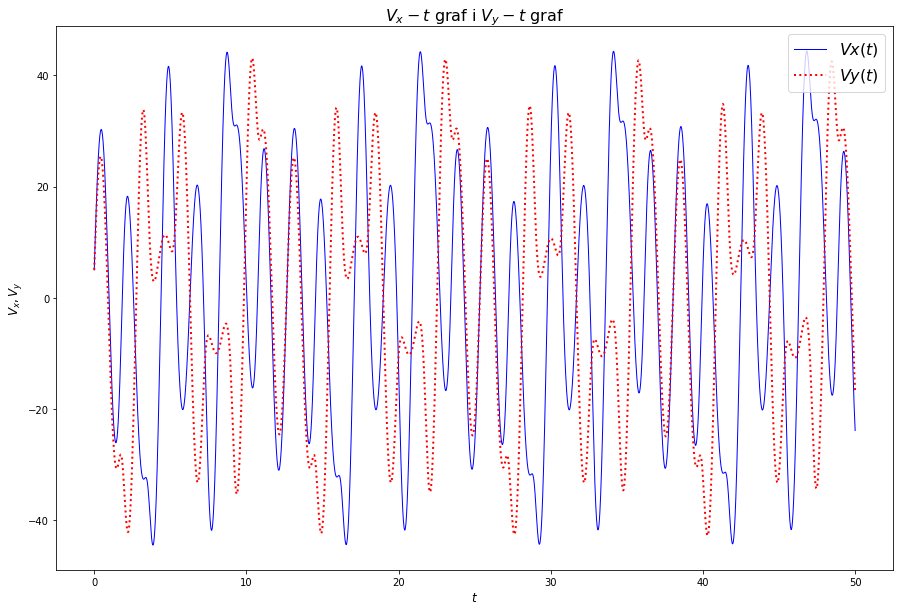

In [147]:
fig6, ax=plt.subplots(figsize=[15,10])
ax.plot(vrijeme, vx1, color="blue", linewidth=1,label='$Vx(t)$')
ax.plot(vrijeme, vy1, color="red",linestyle=':', linewidth=2,label='$Vy(t)$')
ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$V_{x},V_{y}$', fontsize=12)
ax.set_title('$V_{x}-t$ graf i $V_{y}-t$ graf',fontsize=16)
ax.legend(loc="upper right",fontsize=16)
plt.show()

## Treći primjer 

U ovom primjeru početni položaj i brzina u x smjeru su jednaki 0, stoga očekujemo da će tijelo jednostavno vertikalno titrati na opruzi.

In [130]:
vrijednosti02=[0, 0, 5, 5]

vrijednosti2=odeint(funkcije, vrijednosti02, vrijeme, args=(L0, k, m))

x2,y2=vrijednosti2[:,0],vrijednosti2[:,2]
vx2,vy2=vrijednosti2[:,1],vrijednosti2[:,3]

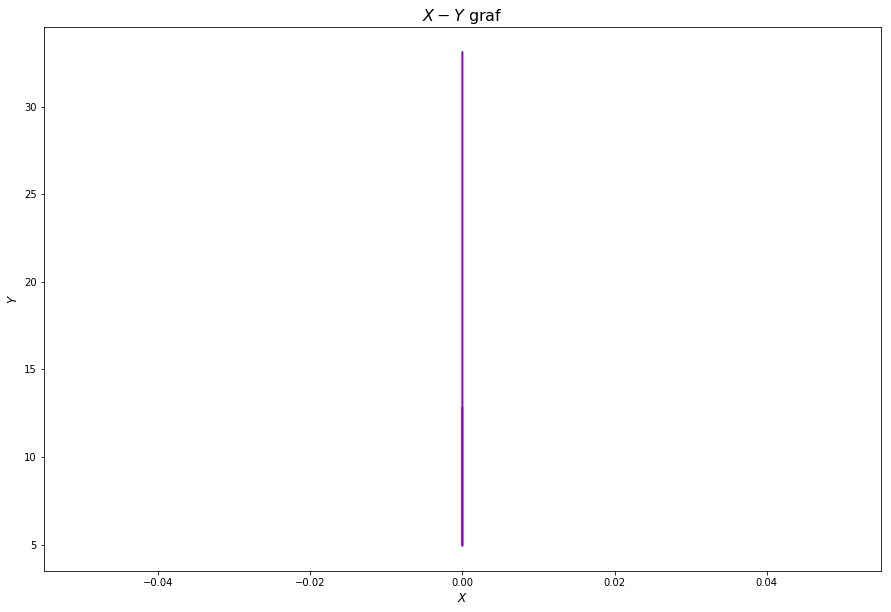

In [131]:
fig1, ax=plt.subplots(figsize=[15,10])
ax.plot(x2, y2, color="darkviolet", linewidth=1.5)
ax.set_xlabel('$X$', fontsize=12)
ax.set_ylabel('$Y$', fontsize=12)
ax.set_title('$X-Y$ graf',fontsize=16)
plt.show()
print('\n')

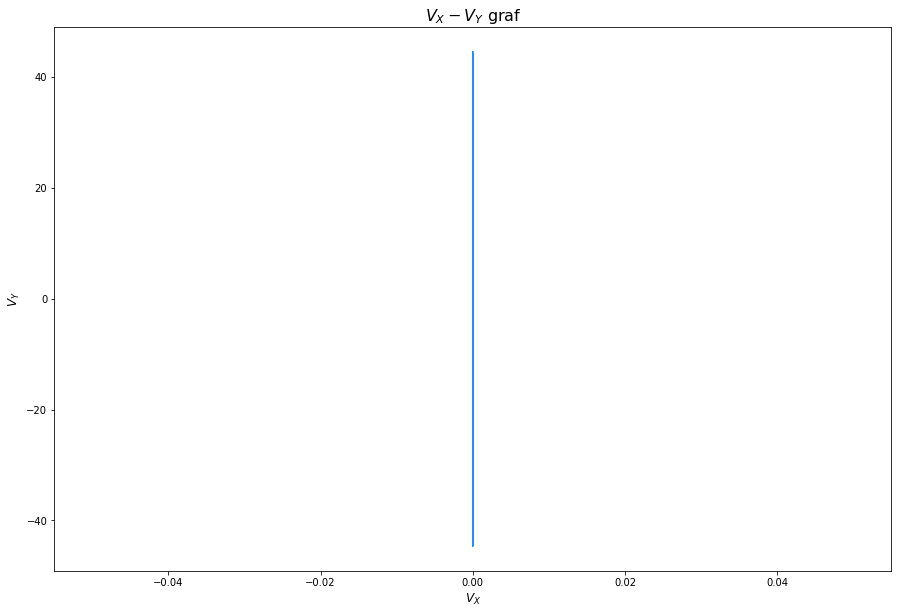

In [132]:
fig2, ax=plt.subplots(figsize=[15,10])
ax.plot(vx2, vy2, color="dodgerblue", linewidth=1.5)
ax.set_xlabel('$V_{X}$', fontsize=12)
ax.set_ylabel('$V_{Y}$', fontsize=12)
ax.set_title('$V_{X}-V_{Y}$ graf',fontsize=16)
plt.show()
print('\n')

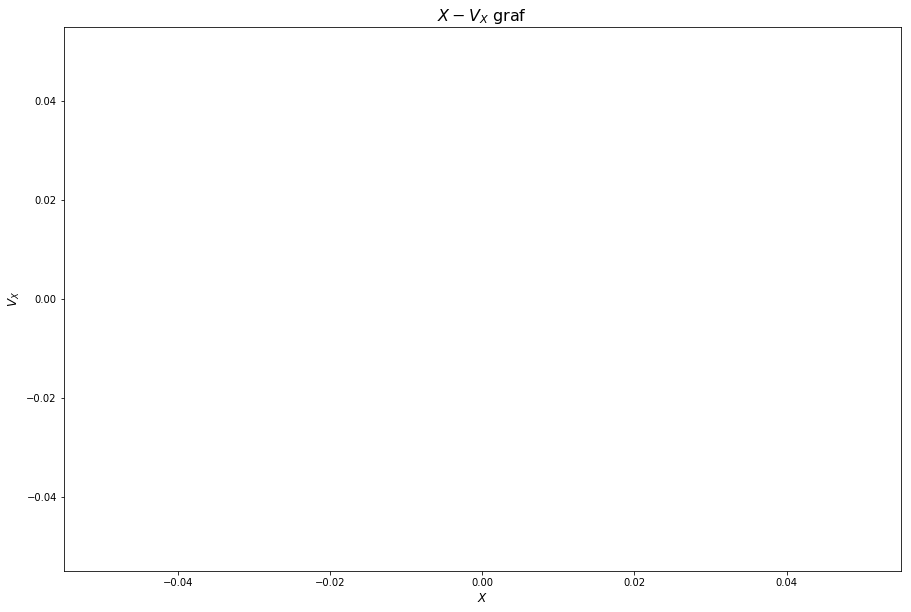

In [119]:
fig3, ax=plt.subplots(figsize=[15,10])
ax.plot(x2, vx2, color="green", linewidth=1.5)
ax.set_xlabel('$X$', fontsize=12)
ax.set_ylabel('$V_{X}$', fontsize=12)
ax.set_title('$X-V_{X}$ graf',fontsize=16)
plt.show()
print('\n')


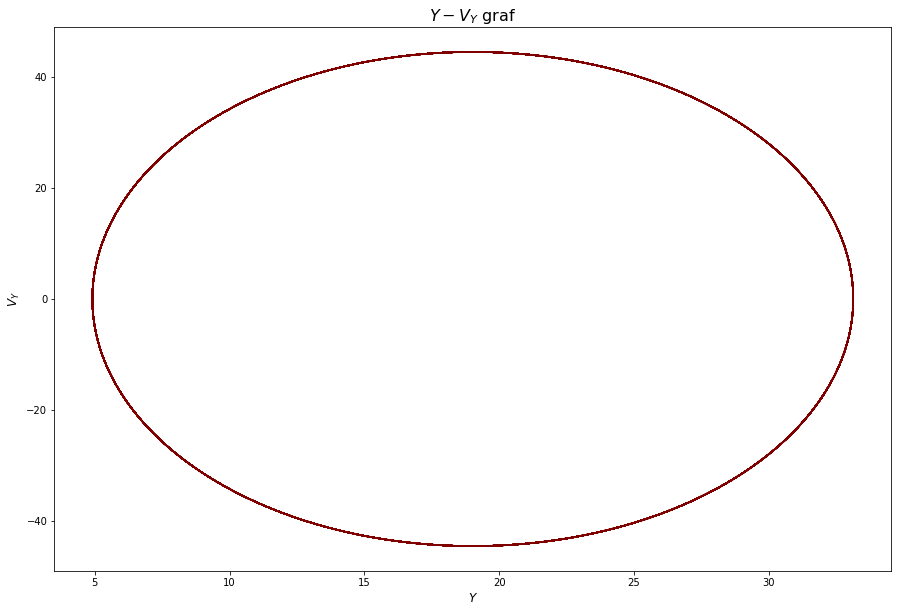

In [133]:
fig4, ax=plt.subplots(figsize=[15,10])
ax.plot(y2, vy2, color="maroon", linewidth=1.5)
ax.set_xlabel('$Y$', fontsize=12)
ax.set_ylabel('$V_{Y}$', fontsize=12)
ax.set_title('$Y-V_{Y}$ graf',fontsize=16)
plt.show()
print('\n')

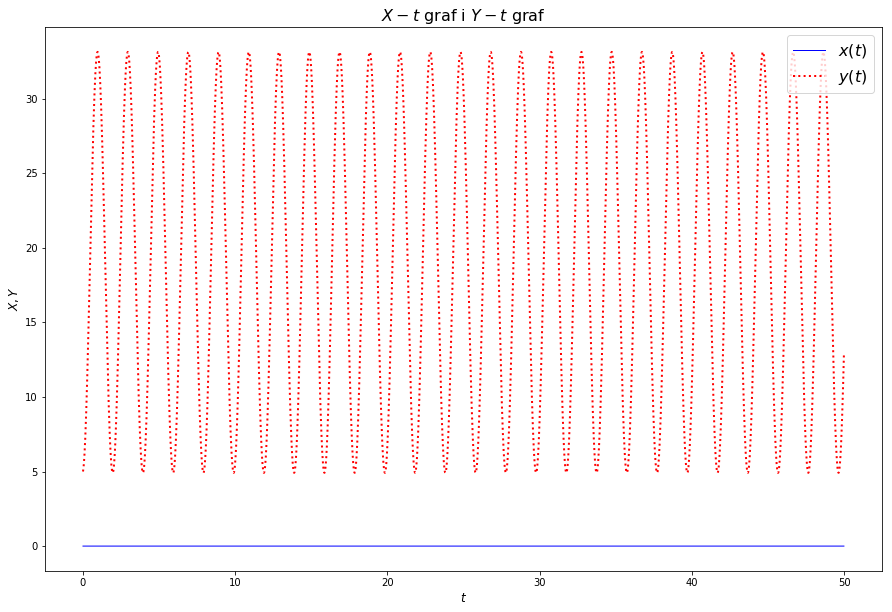

In [134]:
fig5, ax=plt.subplots(figsize=[15,10])
ax.plot(vrijeme, x2, color="blue", linewidth=1,label='$x(t)$')
ax.plot(vrijeme, y2, color="red",linestyle=':', linewidth=2,label='$y(t)$')
ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$X,Y$', fontsize=12)
ax.set_title('$X-t$ graf i $Y-t$ graf',fontsize=16)
ax.legend(loc="upper right",fontsize=16)
plt.show()
print('\n')

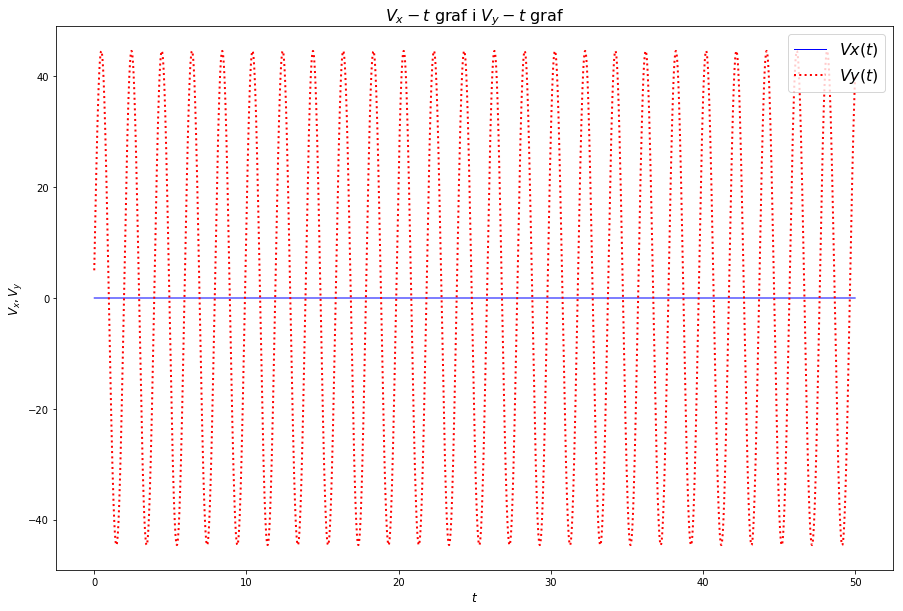

In [116]:
fig6, ax=plt.subplots(figsize=[15,10])
ax.plot(vrijeme, vx2, color="blue", linewidth=1,label='$Vx(t)$')
ax.plot(vrijeme, vy2, color="red",linestyle=':', linewidth=2,label='$Vy(t)$')
ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$V_{x},V_{y}$', fontsize=12)
ax.set_title('$V_{x}-t$ graf i $V_{y}-t$ graf',fontsize=16)
ax.legend(loc="upper right",fontsize=16)
plt.show()

Iz grafova se vidi da poštuju model te da tijelo nastavlja mirovati u x smjeru dok jednoliko titra u y smjeru budući da mu je tu dana početna brzina i otklon.